## 사용만 가능

성능 매우 낮고 분류를 하긴 하는지 모름 전부 [1,] 만 나오는듯 보이기도 함

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import os, cv2
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

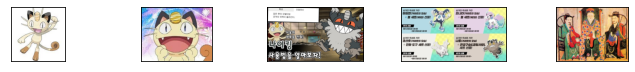

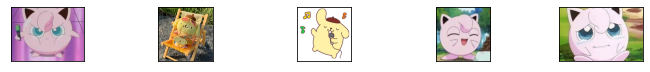

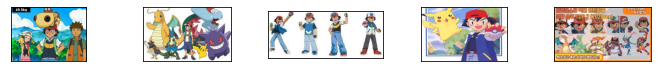

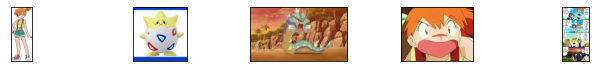

In [3]:
# Train dataset
cnt = 1
kind_of_pokemon = ['class1', 'class2', 'class3', 'class4']
for kind in kind_of_pokemon:
    dir_name = f'../train_test_val/train/{kind}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.jpg')):
        img = Image.open(fname)
        plt.subplot(1, 5, i+1), plt.imshow(img), 
        plt.xticks([]), plt.yticks([])
        cnt += 1
        if cnt == 6:
            cnt = 1
            break
    plt.show()

In [34]:
from PIL import Image
IMAGE_SIZE = 150
def center_image(img, src_format='OpenCV', dst_format='OpenCV'):
    if src_format == 'OpenCV':
        h, w = img.shape[:-1]
    else:                       # Pillow
        h, w = np.array(img).shape[:-1]

    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE

    interpolation = cv2.INTER_AREA if h + w > 300 else cv2.INTER_CUBIC
    new_img = cv2.resize(img, dsize=(width, height), interpolation=interpolation)

    diff = abs(width - height) // 2
    if h > w:
        final_img = new_img[diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[:, diff:diff+IMAGE_SIZE]

    return final_img if dst_format == 'OpenCV' else Image.fromarray(final_img)

In [15]:
img_ary = np.fromfile('../train_test_val/train/class1/나옹1.jpg', np.uint8)
plt.imshow(cv2.imdecode(img_ary, cv2.IMREAD_UNCHANGED)[:,:,::-1]);

FileNotFoundError: [Errno 2] No such file or directory: '../train_test_val/train/class1/나옹1.jpg'

In [31]:
CENTER_DIR = 'c:/workspace/04.SecondProject/centered'
train_dir = f'{CENTER_DIR}/train'
validation_dir = f'{CENTER_DIR}/validation'
train_naong_dir = f'{CENTER_DIR}/train/naong'
train_pulin_dir = f'{CENTER_DIR}/train/pulin'
train_jiwoo_dir = f'{CENTER_DIR}/train/jiwoo'
train_iseul_dir = f'{CENTER_DIR}/train/iseul'
validation_naong_dir = f'{CENTER_DIR}/validation/naong'
validation_pulin_dir = f'{CENTER_DIR}/validation/pulin'
validation_jiwoo_dir = f'{CENTER_DIR}/validation/jiwoo'
validation_iseul_dir = f'{CENTER_DIR}/validation/iseul'

In [8]:
cd ..

c:\workspace\04.SecondProject


In [11]:
if not os.path.exists(CENTER_DIR):
    os.mkdir(CENTER_DIR)
for dir in [train_dir,validation_dir,
            train_naong_dir,
            train_pulin_dir,
            train_jiwoo_dir,
            train_iseul_dir,
            validation_naong_dir,
            validation_pulin_dir,
            validation_jiwoo_dir,
            validation_iseul_dir]:
    os.mkdir(dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'centered/train'

In [36]:
old_train_naong_dir = 'C:/workspace/04.SecondProject/train_test_val/train/class1'
old_train_pulin_dir = 'C:/workspace/04.SecondProject/train_test_val/train/class2'
old_train_jiwoo_dir = 'C:/workspace/04.SecondProject/train_test_val/train/class3'
old_train_iseul_dir = 'C:/workspace/04.SecondProject/train_test_val/train/class4'
old_validation_naong_dir = 'C:/workspace/04.SecondProject/train_test_val/val/class1'
old_validation_pulin_dir = 'C:/workspace/04.SecondProject/train_test_val/val/class2'
old_validation_jiwoo_dir = 'C:/workspace/04.SecondProject/train_test_val/val/class3'
old_validation_iseul_dir = 'C:/workspace/04.SecondProject/train_test_val/val/class4'

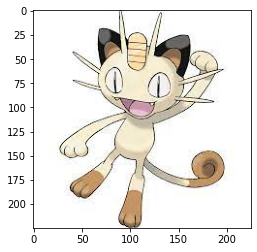

In [43]:
fname = glob('train_test_val/train/class1/*.jpg')[0]
fname[0].split('\\')[-1]

img_ary = np.fromfile(fname, np.uint8)
src_img = cv2.imdecode(img_ary, cv2.IMREAD_COLOR)[:,:,::-1]
plt.imshow(src_img);

In [70]:
src_dir = old_train_naong_dir
for fname in glob(f'{src_dir}/*.jpg'):
    img_ary = np.fromfile(fname.replace("\\",'/'), np.uint8)
    src_img = cv2.imdecode(img_ary, cv2.IMREAD_COLOR)
    cv2.imread(fname)
    # print(src_img.shape)

In [75]:
for src_dir in [old_train_naong_dir,
                old_train_pulin_dir,
                old_train_jiwoo_dir,
                old_train_iseul_dir,
                old_validation_naong_dir,
                old_validation_pulin_dir,
                old_validation_jiwoo_dir,
                old_validation_iseul_dir]:
    dst_dir = src_dir.replace('train_test_val', 'centered')
    for fname in glob(f'{src_dir}/*.jpg'):
        dst_fname = fname.split('\\')[-1]
        img_ary = np.fromfile(fname.replace("\\",'/'), np.uint8)
        src_img = cv2.imdecode(img_ary, cv2.IMREAD_COLOR)
        try:
            dst_img = center_image(src_img, src_format='OpenCV', dst_format='Pillow')
        except:
            pass
        dst_img.convert('RGB').save(f'{dst_dir}/{dst_fname}')

In [76]:
model = Sequential([
    Conv2D(16, (3,3), input_shape=(150,150,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [77]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    optimizer=RMSprop(learning_rate=0.001, decay=1e-8),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [78]:
model_path = 'C:/workspace/04.SecondProject/model/best_model.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [81]:
# val 을 validation으로 바꿔줘야함

In [82]:
train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode='binary', target_size=(150,150)
)
test_generator = test_datagen.flow_from_directory(
    validation_dir, batch_size=20, class_mode='binary', target_size=(150,150)
)

Found 2040 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [114]:
!nvidia-smi

Mon Jun  6 15:00:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.95       Driver Version: 512.95       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:07:00.0  On |                  N/A |
|  0%   47C    P8    10W / 215W |   7412MiB /  8192MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [109]:
import tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10440291679568020424
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6269894656
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16604946811261048808
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:07:00.0, compute capability: 7.5"
]


In [112]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
with tf.device("/device:GPU:0"):
    hist = model.fit(
        train_generator, 
        validation_data = test_generator,
        epochs=100, 
        steps_per_epoch=100, 
        validation_steps = 50,
        callbacks = [mc,es]
        )
    

Epoch 1/100
100/100 [==============================] - 2s 18ms/step - loss: -24210287269488099328.0000 - accuracy: 0.2985 - val_loss: -25841922942689083392.0000 - val_accuracy: 0.2964

Epoch 00001: val_loss improved from -4473432601717112832.00000 to -25841922942689083392.00000, saving model to C:/workspace/04.SecondProject/model\best_model.h5
Epoch 2/100
100/100 [==============================] - 2s 15ms/step - loss: -24969088831118639104.0000 - accuracy: 0.2955
Epoch 3/100
100/100 [==============================] - 2s 15ms/step - loss: -25439141047109156864.0000 - accuracy: 0.2940
Epoch 4/100
100/100 [==============================] - 2s 15ms/step - loss: -25486723512312791040.0000 - accuracy: 0.2975
Epoch 5/100
100/100 [==============================] - 1s 15ms/step - loss: -26238534379013931008.0000 - accuracy: 0.2940
Epoch 6/100
100/100 [==============================] - 1s 15ms/step - loss: -26532172153351045120.0000 - accuracy: 0.2945
Epoch 7/100
100/100 [=======================

KeyboardInterrupt: 

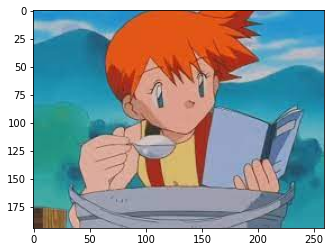

In [101]:
img_path = "C:/workspace/04.SecondProject/train_test_val/test/class4/포켓몬스터_이슬이10.jpg"
img_ary = np.fromfile(img_path, np.uint8)
plt.imshow(cv2.imdecode(img_ary, cv2.IMREAD_UNCHANGED)[:,:,::-1]);

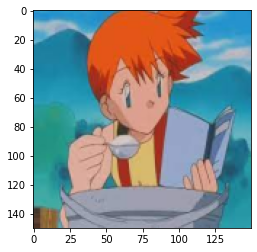

In [102]:
img = cv2.resize(cv2.imdecode(img_ary, cv2.IMREAD_UNCHANGED)[:,:,::-1], dsize=(150,150), interpolation=cv2.INTER_AREA)
plt.imshow(img);

In [103]:
best_model = load_model(model_path)
best_model.predict(img.reshape(1,150,150,3))

array([[1.]], dtype=float32)

In [84]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

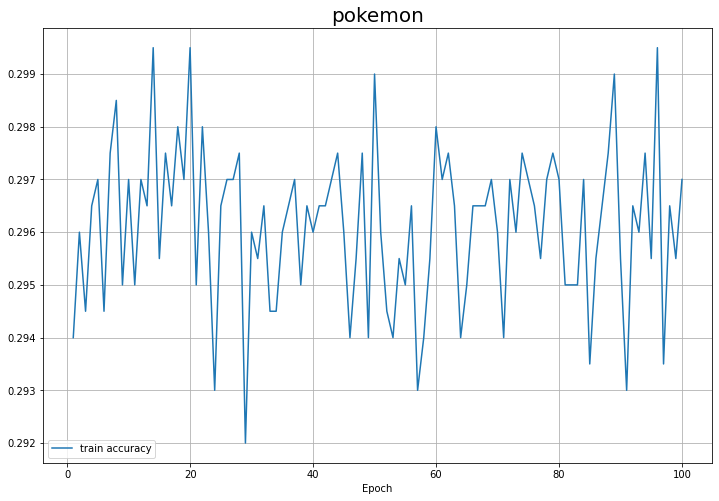

In [86]:
plt.figure(figsize=(12,8))
plt.title('pokemon', size=20)
plt.plot(xs, y_acc, label='train accuracy')
# plt.plot(xs, y_vloss, label='validation loss')


# plt.plot(xs, y_vloss1, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()